In [57]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

from sklearn.model_selection import train_test_split

from sklearn import metrics

from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler


In [8]:
#load the dataset 
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [9]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [13]:
#load the dataset into panda dataframe
hp_df = pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

In [14]:
hp_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [15]:
#add the target column to the dataframe
hp_df['price'] = house_price_dataset.target

In [17]:
hp_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [18]:
#checking the number of rows and columns in the data frame
hp_df.shape

(20640, 9)

In [20]:
#check for missing values
hp_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [21]:
#get statistical measure of the data
hp_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [22]:
correlation = hp_df.corr()

<Axes: >

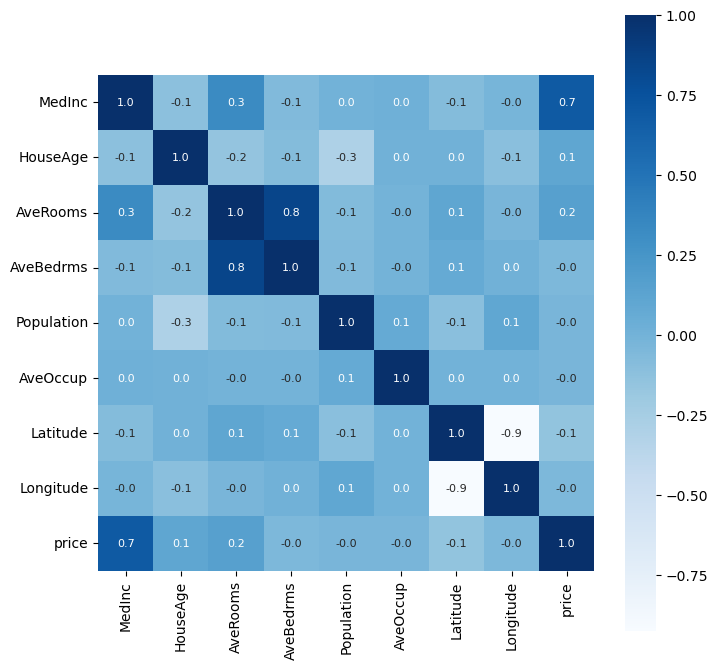

In [29]:
#understanding the co-relation between features
#1 - positive corelation
#2 - negative corelation

plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True, annot_kws={'size':8},cmap='Blues')

In [31]:
#splitting the data into features and target
X = hp_df.drop(['price'],axis = 1)
Y = hp_df['price']

In [32]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [33]:
Y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64

In [ ]:
print(hp_df.iloc[10385])


MedInc           6.411400
HouseAge        15.000000
AveRooms         7.527559
AveBedrms        1.049869
Population    2529.000000
AveOccup         3.318898
Latitude        33.600000
Longitude     -117.650000
price            2.787000
Name: 10385, dtype: float64


In [58]:
##Standardized the data

scaler = StandardScaler()
scaler.fit(X)
std_data = scaler.transform(X)
print(std_data)

[[ 2.34476576  0.98214266  0.62855945 ... -0.04959654  1.05254828
  -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 ... -0.09251223  1.04318455
  -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 ... -0.02584253  1.03850269
  -1.33282653]
 ...
 [-1.14259331 -0.92485123 -0.09031802 ... -0.0717345   1.77823747
  -0.8237132 ]
 [-1.05458292 -0.84539315 -0.04021111 ... -0.09122515  1.77823747
  -0.87362627]
 [-0.78012947 -1.00430931 -0.07044252 ... -0.04368215  1.75014627
  -0.83369581]]


In [59]:
#splitting the data into training data and test data
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [60]:
print(X.shape,x_train.shape,x_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [61]:
print(x_test)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
10385  6.4114      15.0  7.527559   1.049869      2529.0  3.318898     33.60   
1943   4.1843      12.0  6.330084   1.041783      2033.0  2.831476     38.62   
7490   1.7411      35.0  5.369159   1.294393       909.0  4.247664     33.93   
16889  3.4412      39.0  4.173405   1.074573      2156.0  1.937107     37.59   
11416  7.8195      16.0  8.602349   1.058725      2142.0  3.593960     33.70   
...       ...       ...       ...        ...         ...       ...       ...   
13767  4.8173      25.0  6.160494   1.081481      1071.0  2.644444     34.04   
20606  2.0800      30.0  5.140316   1.055336      1702.0  3.363636     39.12   
7340   2.1743      30.0  3.364395   0.994437      3208.0  4.461752     33.97   
14312  1.6023      32.0  3.878788   1.069697      1335.0  4.045455     32.70   
20262  4.2227      28.0  4.899533   0.947430      2556.0  2.985981     34.21   

       Longitude  
10385    -117.65  
1

In [62]:
#model training
#loading the model
model = XGBRegressor()

#training the model
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [63]:
#evaluation
#prediction on the training data
training_data_prediction = model.predict(x_train)

In [64]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [65]:
#now we need to evaluate the model output against the actual output

#R square error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# mean absolute error
score_2 = metrics.mean_absolute_error(y_train,training_data_prediction)

print('R square error :',score_1)
print('MAE error :',score_2)

score_3 = metrics.mean_absolute_percentage_error(y_train,training_data_prediction)
print('MAPE error :',score_3)


R square error : 0.943650140819218
MAE error : 0.1933648700612105
MAPE error : 0.11007680788443346


In [66]:
#prediction on the test data
test_data_prediction = model.predict(x_test)

In [67]:
#R square error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# mean absolute error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print('R square error :',score_1)
print('MAE error :',score_2)

score_3 = metrics.mean_absolute_percentage_error(y_test, test_data_prediction)
print('MAPE error :',score_3)


R square error : 0.8338000331788725
MAE error : 0.3108631800268186
MAPE error : 0.175521805602385


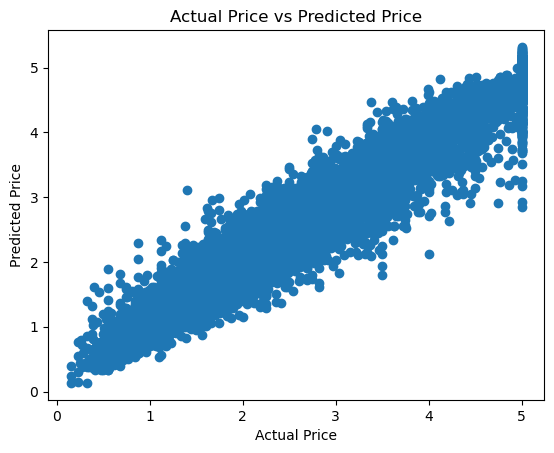

In [68]:
#Visulizing the actual prices and predicted prices
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [69]:
#predict the price using the trained model

input_data = (6.4114,15.0,7.527559,1.049869,2529.0,3.318898,33.60,-117.65)
# we need to change the data to numpy array
input_data_as_numpyarray = np.asarray(input_data)
# now we need to reshape this data
input_data_reshaped = input_data_as_numpyarray.reshape(1,-1)

print('input_data_reshaped :',input_data_reshaped)

single_data_prediction = model.predict(input_data_reshaped)

# prediction = loaded_model.predict(input_data_reshaped)
print('Single Data Prediction : ',single_data_prediction)


input_data_reshaped : [[ 6.411400e+00  1.500000e+01  7.527559e+00  1.049869e+00  2.529000e+03
   3.318898e+00  3.360000e+01 -1.176500e+02]]
Single Data Prediction :  [2.8649795]
